# Quadrupole scan during the ESA ion run

In [15]:
import pickle
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

OSError: JVM is already started

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import os
def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 18
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

In [82]:
current_path = os.getcwd()
folders = [f for f in os.listdir(current_path) if os.path.isdir(os.path.join(current_path, f))]

for folder in folders:
    p_file = os.path.join(folder, f'{folder}.p')
    
    if os.path.isfile(p_file):
        with open(p_file, 'rb') as f:
            data = pickle.load(f)
        print(data[0][0])

2022-11-27 13:11:09.183513
2022-11-27 13:25:55.398627
2022-11-27 13:32:55.840019
2022-11-27 13:45:33.981174
2022-11-27 13:56:23.311945
2022-11-27 14:12:10.111826
2022-11-27 14:26:25.456950


Standard deviation for F61.QFN01/MEAS.PULSE#VALUE: 0.0029590470534913457
Standard deviation for F61.QDN02/MEAS.PULSE#VALUE: 0.0019656759012605337
Standard deviation for F61.QFN03/MEAS.PULSE#VALUE: 0.0015062005753110847
Standard deviation for F61.QDN04/MEAS.PULSE#VALUE: 0.0009815892817026477
Standard deviation for T8.QFN05/MEAS.PULSE#VALUE: 0.002526354388856276
Standard deviation for T8.QDN06/MEAS.PULSE#VALUE: 0.002334451206167292
Standard deviation for T8.QDN07/MEAS.PULSE#VALUE: 0.002573416231085265
Standard deviation for T8.QFN08/MEAS.PULSE#VALUE: 23.244559901485978
Non-constant values:
T8.QFN08/MEAS.PULSE#VALUE: 23.244559901485978
The quadrupole being scanned is T8.QFN08/MEAS.PULSE#VALUE !
Standard deviation for F61.QFN01/MEAS.PULSE#VALUE: 0.0018041234787414147
Standard deviation for F61.QDN02/MEAS.PULSE#VALUE: 0.0018021958463932076
Standard deviation for F61.QFN03/MEAS.PULSE#VALUE: 0.0018855713628664723
Standard deviation for F61.QDN04/MEAS.PULSE#VALUE: 0.0008989803798389849
Standar

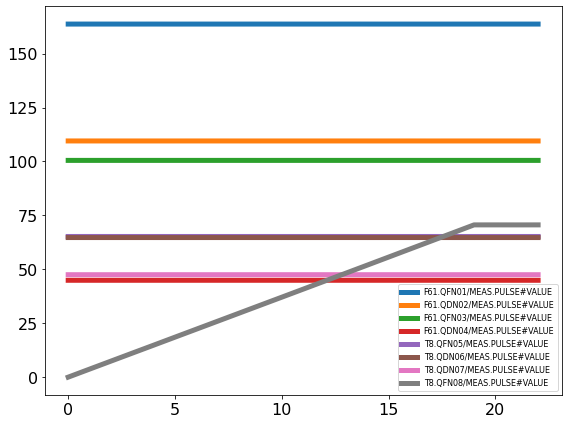

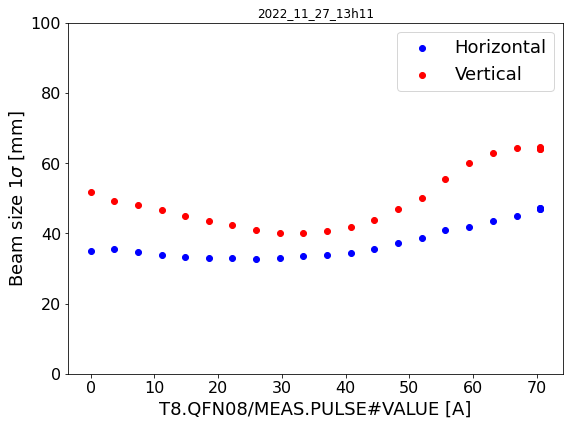

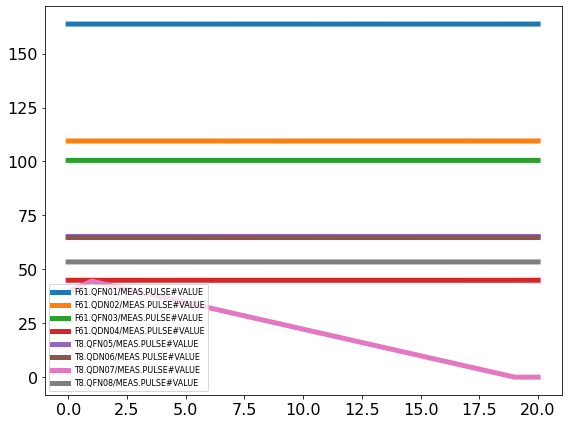

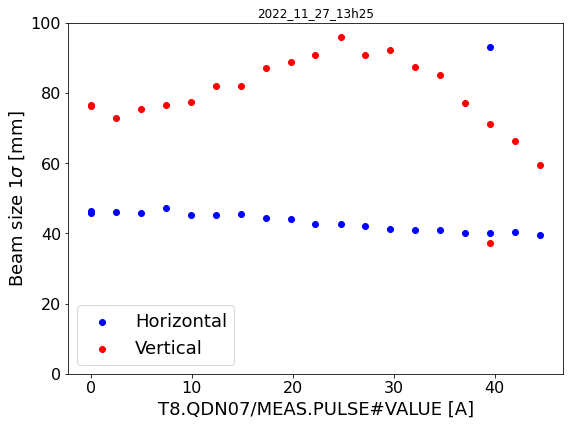

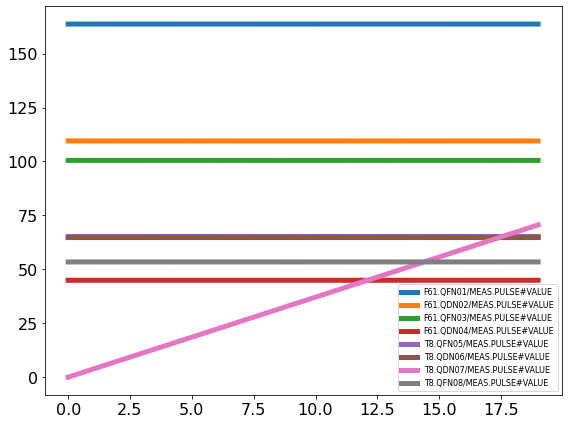

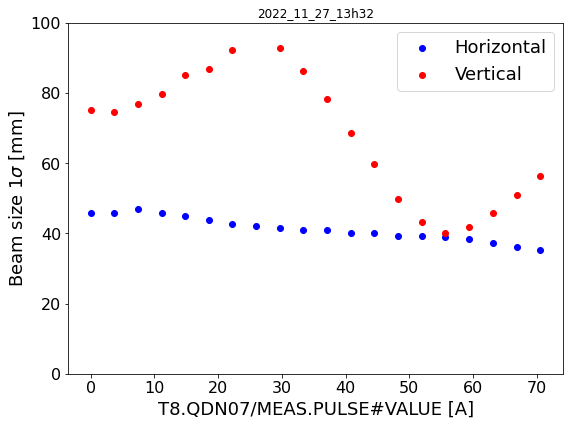

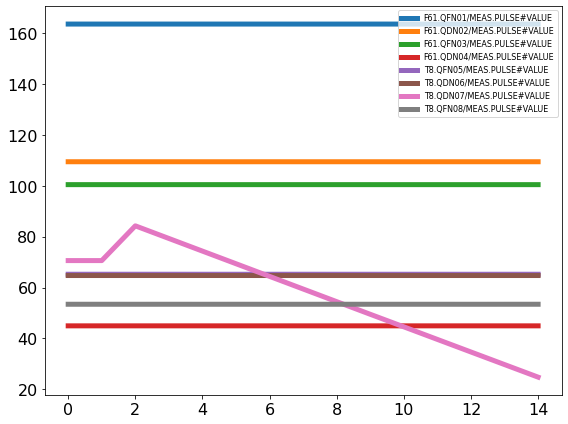

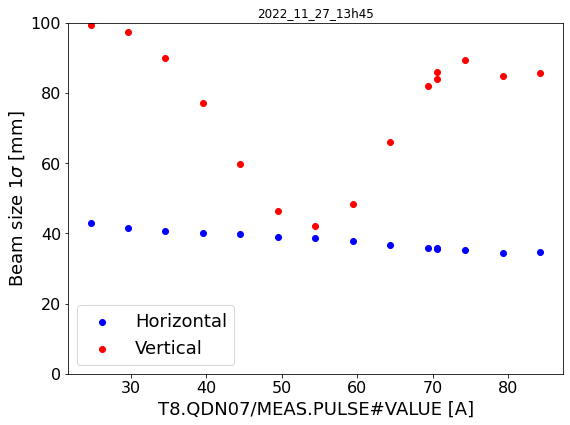

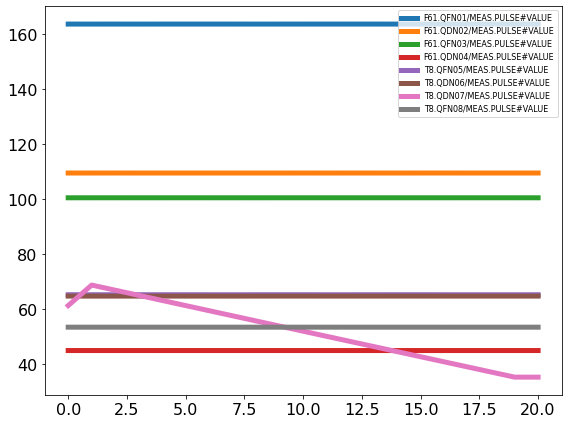

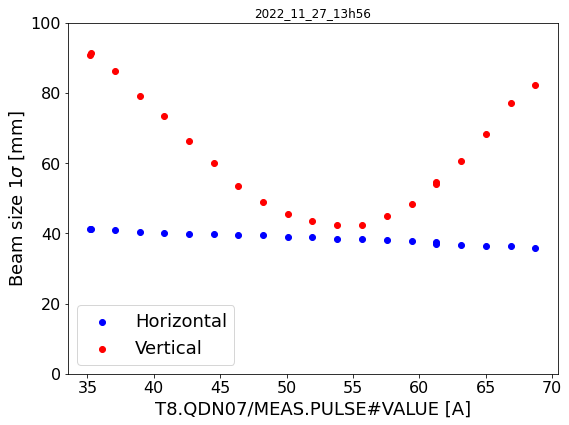

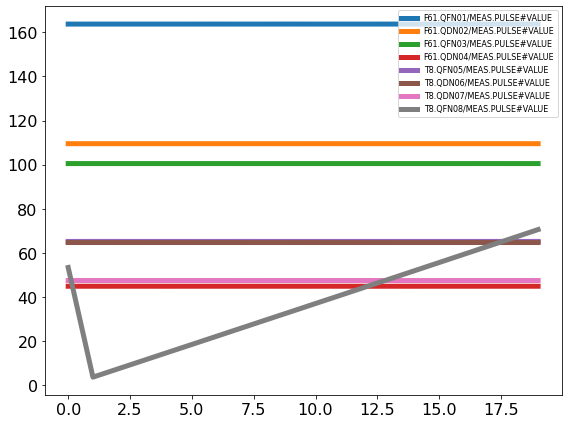

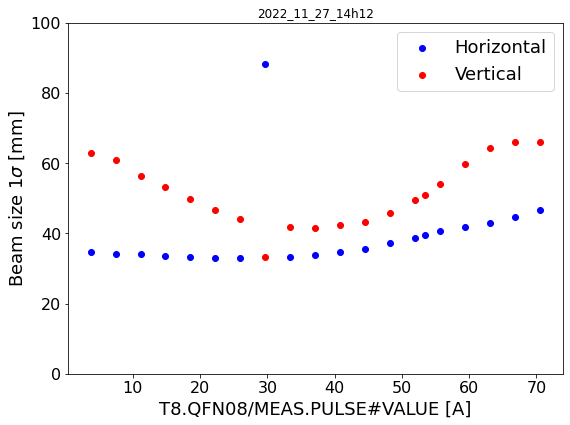

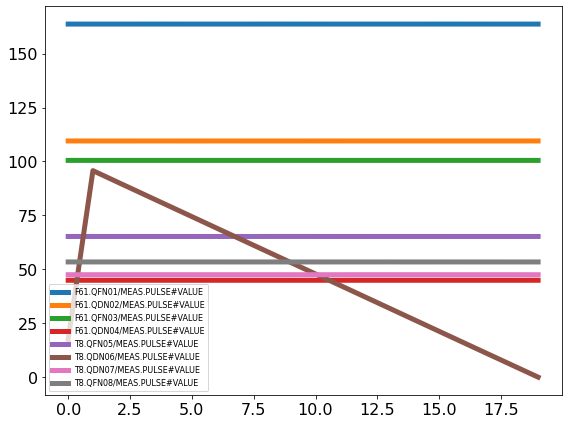

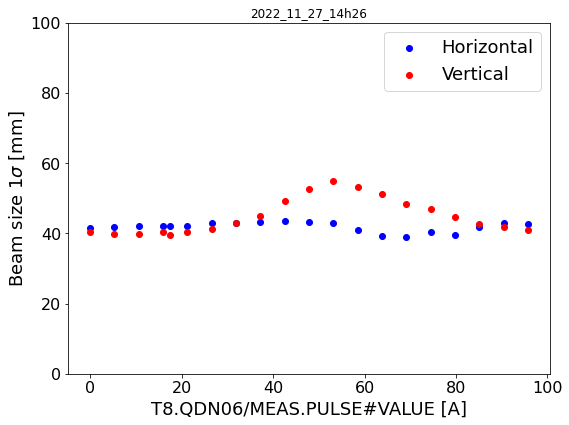

In [126]:
current_path = os.getcwd()
folders = [f for f in os.listdir(current_path) if os.path.isdir(os.path.join(current_path, f))]

for folder in folders:
    p_file = os.path.join(folder, f'{folder}.p')
    
    if os.path.isfile(p_file):
        with open(p_file, 'rb') as f:
            data = pickle.load(f)

        fig, ax = plt.subplots(tight_layout=True, figsize=(8,6))

        # Calculate standard deviation for each magnet's data and store in a dictionary
        std_devs = {}

        for magnet in data[1].keys():
            ax.plot(data[1][magnet], label=magnet, lw=5)
            std_devs[magnet] = np.std(data[1][magnet])

        ax.legend(fontsize=8)

        # Print standard deviations for each magnet's data
        for magnet, std_dev in std_devs.items():
            print(f"Standard deviation for {magnet}: {std_dev}")

        # Identify the non-constant values (you may need to adjust the threshold as per your requirements)
        threshold = 1.0
        non_constant_values = {magnet: std_dev for magnet, std_dev in std_devs.items() if std_dev > threshold}

        print("Non-constant values:")
        for magnet_scanned, std_dev in non_constant_values.items():
            print(f"{magnet_scanned}: {std_dev}")

        print(f"The quadrupole being scanned is {magnet_scanned} !")

        ## Plot the quad scan

        Hsigma = []
        Vsigma = []
        for i in range(len(data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions'])):
            Hsigma.append(data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions'][i]["HSigma"])
            Vsigma.append(data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions'][i]["VSigma"])

        fig, ax = plt.subplots(tight_layout=True, figsize=(8,6))
        ax.scatter(data[1][magnet_scanned], Hsigma, c="b", label="Horizontal")
        ax.scatter(data[1][magnet_scanned], Vsigma, c="r", label="Vertical")
        ax.legend()
        ax.set_xlabel(f"{magnet_scanned} [A]")
        ax.set_ylabel("Beam size $1\sigma$ [mm]")
        ax.set_title(f"{data[0][0].strftime('%Y_%m_%d_%Hh%M')}")
        ax.set_ylim(0, 100)
        plt.savefig(f"fig/quadrupole_scan_ion_t8_esa_run_beam_size_{data[0][0].strftime('%Hh%M')}_{magnet_scanned.replace('/','_')}.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

# Centroid

Standard deviation for F61.QFN01/MEAS.PULSE#VALUE: 0.0029590470534913457
Standard deviation for F61.QDN02/MEAS.PULSE#VALUE: 0.0019656759012605337
Standard deviation for F61.QFN03/MEAS.PULSE#VALUE: 0.0015062005753110847
Standard deviation for F61.QDN04/MEAS.PULSE#VALUE: 0.0009815892817026477
Standard deviation for T8.QFN05/MEAS.PULSE#VALUE: 0.002526354388856276
Standard deviation for T8.QDN06/MEAS.PULSE#VALUE: 0.002334451206167292
Standard deviation for T8.QDN07/MEAS.PULSE#VALUE: 0.002573416231085265
Standard deviation for T8.QFN08/MEAS.PULSE#VALUE: 23.244559901485978
Non-constant values:
T8.QFN08/MEAS.PULSE#VALUE: 23.244559901485978
The quadrupole being scanned is T8.QFN08/MEAS.PULSE#VALUE !
Standard deviation for F61.QFN01/MEAS.PULSE#VALUE: 0.0018041234787414147
Standard deviation for F61.QDN02/MEAS.PULSE#VALUE: 0.0018021958463932076
Standard deviation for F61.QFN03/MEAS.PULSE#VALUE: 0.0018855713628664723
Standard deviation for F61.QDN04/MEAS.PULSE#VALUE: 0.0008989803798389849
Standar

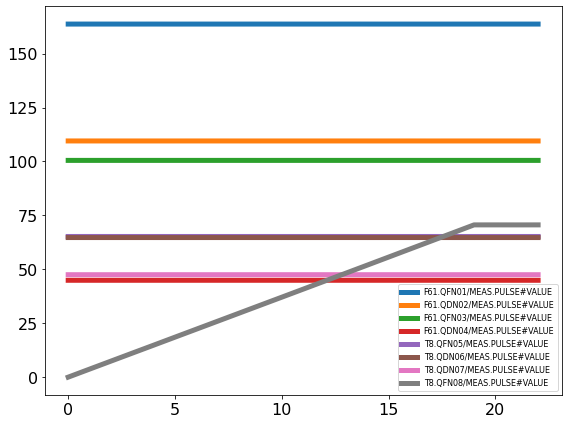

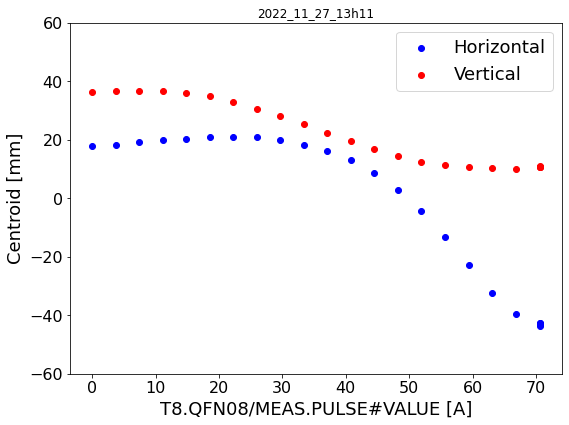

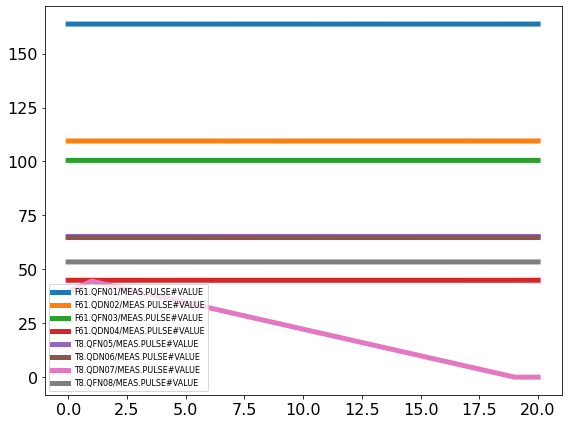

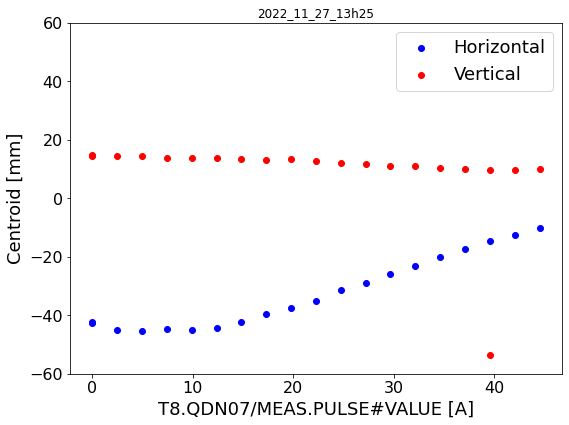

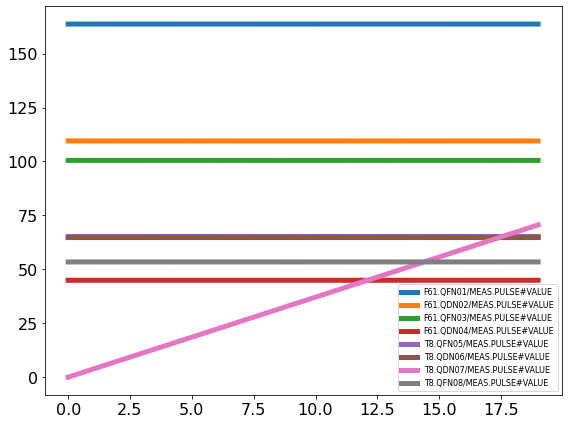

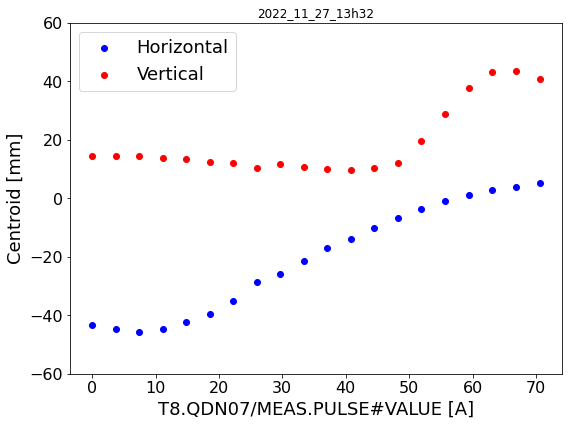

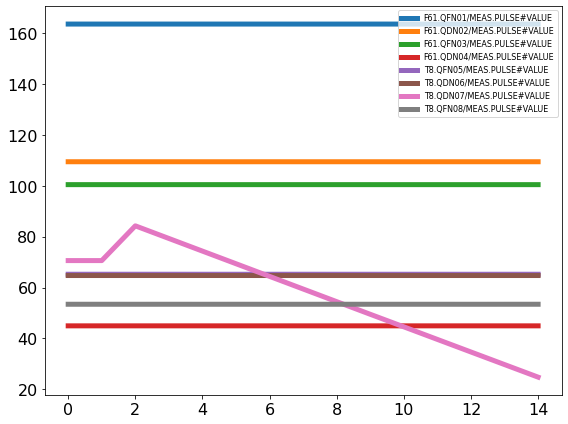

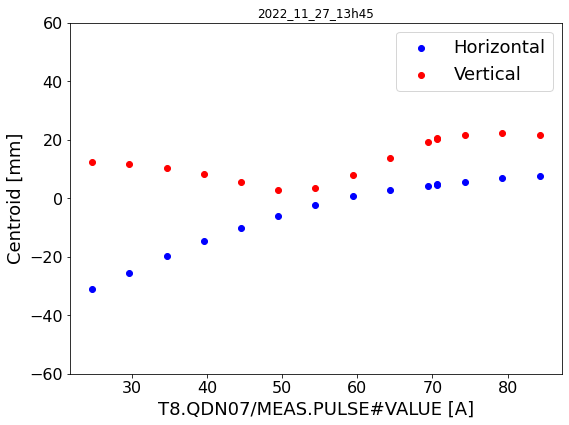

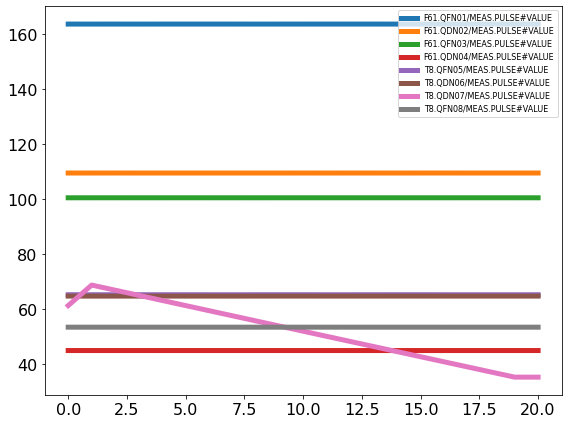

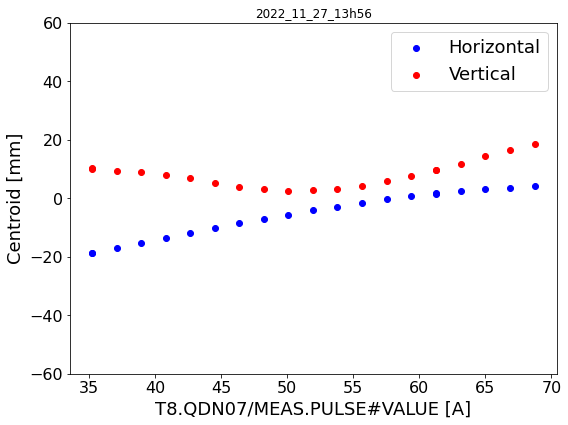

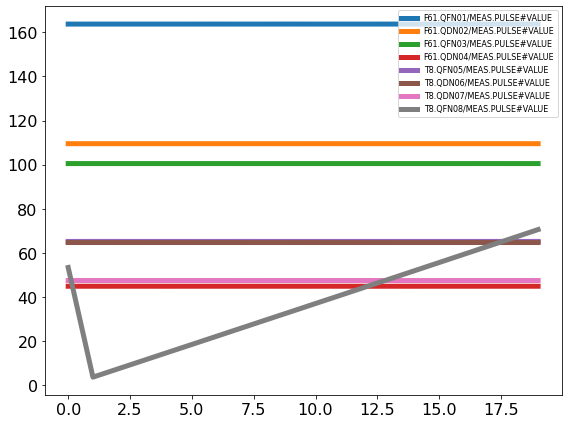

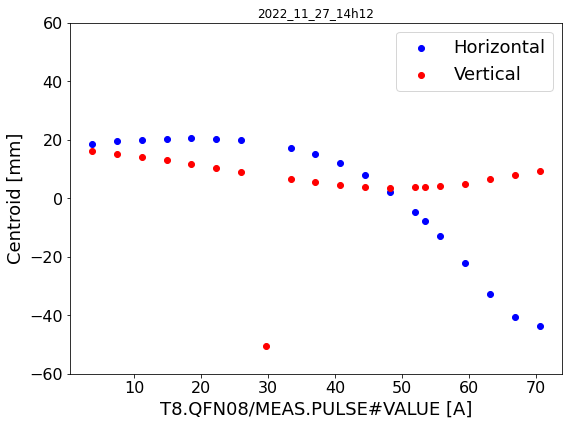

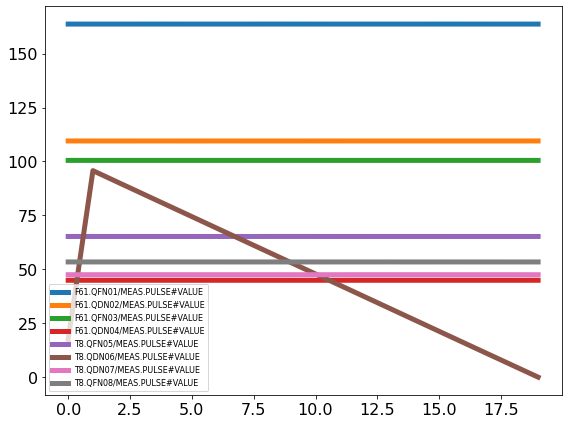

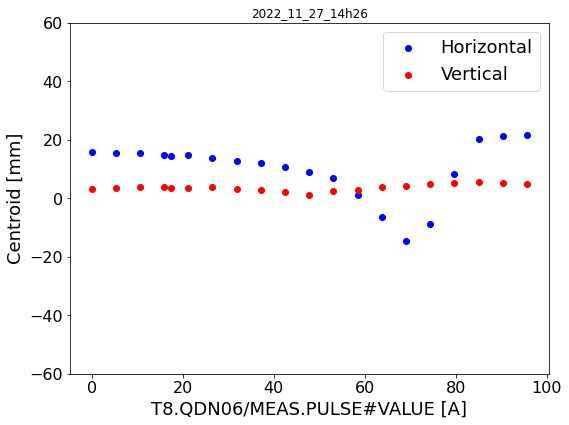

In [127]:
current_path = os.getcwd()
folders = [f for f in os.listdir(current_path) if os.path.isdir(os.path.join(current_path, f))]

for folder in folders:
    p_file = os.path.join(folder, f'{folder}.p')
    
    if os.path.isfile(p_file):
        with open(p_file, 'rb') as f:
            data = pickle.load(f)

        fig, ax = plt.subplots(tight_layout=True, figsize=(8,6))

        # Calculate standard deviation for each magnet's data and store in a dictionary
        std_devs = {}

        for magnet in data[1].keys():
            ax.plot(data[1][magnet], label=magnet, lw=5)
            std_devs[magnet] = np.std(data[1][magnet])

        ax.legend(fontsize=8)

#         Print standard deviations for each magnet's data
        for magnet, std_dev in std_devs.items():
            print(f"Standard deviation for {magnet}: {std_dev}")

        # Identify the non-constant values (you may need to adjust the threshold as per your requirements)
        threshold = 1.0
        non_constant_values = {magnet: std_dev for magnet, std_dev in std_devs.items() if std_dev > threshold}

        print("Non-constant values:")
        for magnet_scanned, std_dev in non_constant_values.items():
            print(f"{magnet_scanned}: {std_dev}")

        print(f"The quadrupole being scanned is {magnet_scanned} !")

        ## Plot the quad scan

        HCenter = []
        VCenter = []
        for i in range(len(data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions'])):
            HCenter.append(data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions'][i]["HCenter"])
            VCenter.append(data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions'][i]["VCenter"])

        fig, ax = plt.subplots(tight_layout=True, figsize=(8,6))
        ax.scatter(data[1][magnet_scanned], HCenter, c="b", label="Horizontal")
        ax.scatter(data[1][magnet_scanned], VCenter, c="r", label="Vertical")
        ax.legend()
        ax.set_xlabel(f"{magnet_scanned} [A]")
        ax.set_ylabel("Centroid [mm]")
        ax.set_title(f"{data[0][0].strftime('%Y_%m_%d_%Hh%M')}")
        ax.set_ylim(-60,60)
        plt.savefig(f"fig/quadrupole_scan_ion_t8_esa_run_centroid_{data[0][0].strftime('%Hh%M')}_{magnet_scanned.replace('/','_')}.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')